# Ciclo01: End to End

# 0.0 - IMPORTS 

In [70]:
import pandas as pd
from sklearn import  model_selection as ms
from sklearn import preprocessing as pp
from sklearn import metrics as m
from scikitplot import metrics as mt

from keras import models as ml
from keras import layers as l

## 0.1 - Helper functions

## 0.2 - Loading data

In [2]:
df_raw = pd.read_csv('dataset/train_users_2.csv', low_memory=True)
df_sessions = pd.read_csv('dataset/sessions.csv', low_memory=True)

# 1.0 - DATA DESCRIPTION

In [17]:
df1 = df_raw.copy()

In [18]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 213451
Number of columns: 16


## 1.1 - Data type

In [19]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

## 1.2 - NA check

In [20]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [21]:
df1 = df1.dropna()
df1.shape

(68171, 16)

## 1.3 - Change dtypes

In [22]:
# date_account_created
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])

# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')

#date_first_booking
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])

# age
df1['age'] = df1['age'].astype(int)

## 1.4 - Check balanced data

In [23]:
df1['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2.0 - DATA FILTERING

In [25]:
df2 = df1.copy()

## 2.1 - Filtering rows

## 2.2 - Columns selection

# 3.0 - DATA PREPARATION

In [54]:
df3 = df2.copy()

In [55]:
# dummy variable
df3_dummy = pd.get_dummies(df3.drop(['id', 'country_destination'], axis=1))

# join id and country destination
df3 = pd.concat([df3[['id', 'country_destination']], df3_dummy], axis=1)

# 4.0 - FEATURE SELECTION

In [56]:
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking']
df4 = df3.drop(cols_drop, axis=1)

# 5.0 MACHINE LEARNING MODEL - NEURAL NETWORK MLP

In [57]:
X = df4.drop(['country_destination'], axis=1)
y = df4['country_destination'].copy()

In [58]:
# Split dataset into training and test
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=32)

In [59]:
x_train = X_train.drop('id', axis=1)
x_test = X_test.drop('id', axis=1)

In [60]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1,1)).toarray()

In [63]:
# model definition
model = ml.Sequential()
model.add(l.Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(l.Dense(11, activation='softmax'))

# model_compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# trin model
model.fit(x_train, y_train_nn, epochs=100)

Epoch 1/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.3184 - accuracy: 0.7054
Epoch 2/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.2734 - accuracy: 0.7078
Epoch 3/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.2261 - accuracy: 0.7082
Epoch 4/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.2057 - accuracy: 0.7081
Epoch 5/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1868 - accuracy: 0.7087
Epoch 6/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1688 - accuracy: 0.7087
Epoch 7/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1613 - accuracy: 0.7085
Epoch 8/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1467 - accuracy: 0.7087
Epoch 9/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1414 - accuracy: 0.7090
Epoch 10/100
1705/1705 [==============================] - 4s 2ms/step - l

1705/1705 [==============================] - 4s 2ms/step - loss: 1.0981 - accuracy: 0.7121
Epoch 80/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.0986 - accuracy: 0.7118
Epoch 81/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0981 - accuracy: 0.7116
Epoch 82/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0978 - accuracy: 0.7121
Epoch 83/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0980 - accuracy: 0.7120
Epoch 84/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0979 - accuracy: 0.7122
Epoch 85/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0980 - accuracy: 0.7118
Epoch 86/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0966 - accuracy: 0.7121
Epoch 87/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0969 - accuracy: 0.7122
Epoch 88/100
1705/1705 [==============================] - 3s 2ms/step - loss:

# 5.0 - NN PERFORMANCE

In [66]:
# prediction
pred_nn = model.predict(x_test)

# invert_prediction
yhat_nn = ohe.inverse_transform(pred_nn)

# prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape(1, -1)[0]

Accuracy: 0.7034103410341034


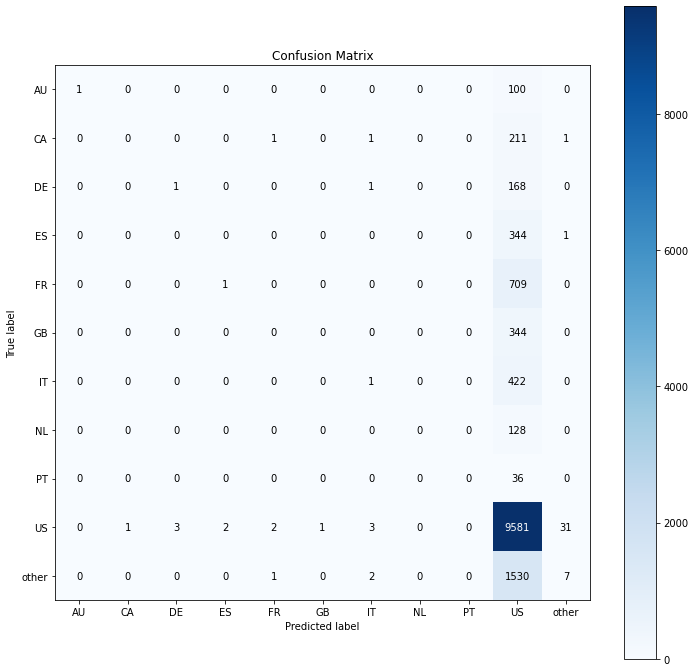

In [76]:
# Accuracy
acc_nn = m.accuracy_score(y_test, yhat_nn)
print('Accuracy: {}'.format(acc_nn))

# Confusion Matrix
mt.plot_confusion_matrix(y_test_nn, yhat_nn, normalize=False, figsize=(12, 12));

# Balanced Accuracy

# F-Score Balanced

# Recall-Precision

# ROC

# Kappa Metrics

# Matthew Metrics